In [1]:
import pandas as pd
import numpy as np
from pandas import Series as sr, DataFrame as df
import matplotlib.pyplot as plt
import seaborn as sns
#style.use('seaborn')
%matplotlib inline

In [2]:
data = pd.read_csv("../data.txt", sep = ' ', header = None)
data.head()

,0,1,2,3,4,5,6,7
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964


In [3]:
data_column_names = ["Date", "Time", "Epoch", "Moteid", "Temperature", "Humidity", "Light", "Voltage"]
dplot = pd.read_csv("../data.txt", sep = ' ', names = data_column_names)
dplot.shape

(2313682, 8)

In [4]:
s = 34.0
data = data[data[3]==s]
data.head()

,0,1,2,3,4,5,6,7
1375148,2004-02-28,00:58:47.044836,2,34.0,19.4298,39.0763,60.72,2.68742
1375149,2004-02-28,01:00:46.152417,6,34.0,18.8712,40.2976,60.72,2.67532
1375150,2004-02-28,01:01:46.910259,8,34.0,18.7144,40.7706,60.72,2.67532
1375151,2004-02-28,01:03:16.886569,11,34.0,18.5576,41.1078,60.72,2.67532
1375152,2004-02-28,01:04:46.859249,14,34.0,18.4694,41.3435,60.72,2.67532


In [5]:
# print(S1df.shape)
outliersILista = []
outliersIListaV = []
for i, row in data.iterrows():
    if row[4] >=26.2 :
        outliersILista.append(i)
        outliersIListaV.append(row[4])
print(data.shape, len(outliersILista))
# Removendo outliers no sensor
passo3= data.copy()
print(passo3.head())
print(passo3.shape)
passo3= passo3.drop(outliersILista)
print(passo3.shape)
passo3.to_csv('sensor.csv')
data = pd.read_csv("sensor.csv")
data.shape
data.drop(['Unnamed: 0'], axis=1,inplace=True)
# data.head(1)
for key,d in data[:data.shape[0]].groupby('3'):
    print(key,"\n",d.head())
    print("--------------------------------")

(48786, 8) 18059
                  0                1   2     3        4        5      6  \
1375148  2004-02-28  00:58:47.044836   2  34.0  19.4298  39.0763  60.72   
1375149  2004-02-28  01:00:46.152417   6  34.0  18.8712  40.2976  60.72   
1375150  2004-02-28  01:01:46.910259   8  34.0  18.7144  40.7706  60.72   
1375151  2004-02-28  01:03:16.886569  11  34.0  18.5576  41.1078  60.72   
1375152  2004-02-28  01:04:46.859249  14  34.0  18.4694  41.3435  60.72   

               7  
1375148  2.68742  
1375149  2.67532  
1375150  2.67532  
1375151  2.67532  
1375152  2.67532  
(48786, 8)
(30727, 8)
34.0 
             0                1   2     3        4        5      6        7
0  2004-02-28  00:58:47.044836   2  34.0  19.4298  39.0763  60.72  2.68742
1  2004-02-28  01:00:46.152417   6  34.0  18.8712  40.2976  60.72  2.67532
2  2004-02-28  01:01:46.910259   8  34.0  18.7144  40.7706  60.72  2.67532
3  2004-02-28  01:03:16.886569  11  34.0  18.5576  41.1078  60.72  2.67532
4  2004-02-28 

In [6]:
for key, d in data[:data.shape[0]].groupby('3'):
    break
    d.head()

d = d.sort_values(['0','1'],ascending = [1,1])
d.shape, (d.tail())

((30727, 8),
                 0                1      2     3     4        5        6  \
 28784  2004-04-01  23:47:50.124306  61302  34.0   NaN      NaN      NaN   
 28790  2004-04-01  23:51:49.336915  61310  34.0   NaN      NaN      NaN   
 28800  2004-04-03  03:12:54.471277  61327  34.0 -38.4  31.5959      NaN   
 28803  2004-04-03   07:48:44.91692  61329  34.0 -38.4  29.6850  1847.36   
 28807  2004-04-03  16:51:34.171452  61333  34.0 -38.4  38.6334      NaN   
 
              7  
 28784  2.12114  
 28790  2.12114  
 28800  1.86767  
 28803  1.85600  
 28807  1.90971  )

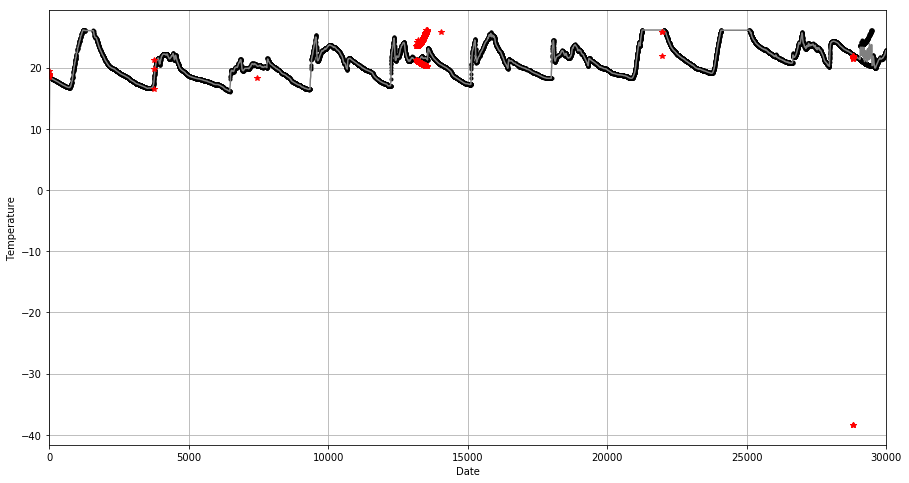

In [7]:
from itertools import count
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
%matplotlib inline
def moving_average(data, window_size):

    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')


def explain_anomalies(y, window_size, sigma=1.0):

    avg = moving_average(y, window_size).tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    std = np.std(residual)
    return {'standard_deviation': round(std, 2),
            'anomalies_dict': collections.OrderedDict([(index, y_i) for
                                                       index, y_i, avg_i in zip(count(), y, avg)
              if (y_i > avg_i + (sigma*std)) | (y_i < avg_i - (sigma*std))])}

# This function is repsonsible for displaying how the function performs on the given dataset.
def plot_results(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):

    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='gray')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
    plt.plot(x_anomaly, y_anomaly, "r*")
    #print(x_anomaly)

    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()

# This function is repsonsible for displaying how the function performs on the given dataset.
def plot_results2(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):

    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='gray')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    if applying_rolling_std:
        events = explain_anomalies_rolling_std(y, window_size=window_size, sigma=sigma_value)
    else:
        events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, )
    #print(x_anomaly)

    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()


# 4. Lets play with the functions
x = data[:data.shape[0]]['2']
Y = data[:data.shape[0]]['4']

# plot the results
plot_results(x, y=Y, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")



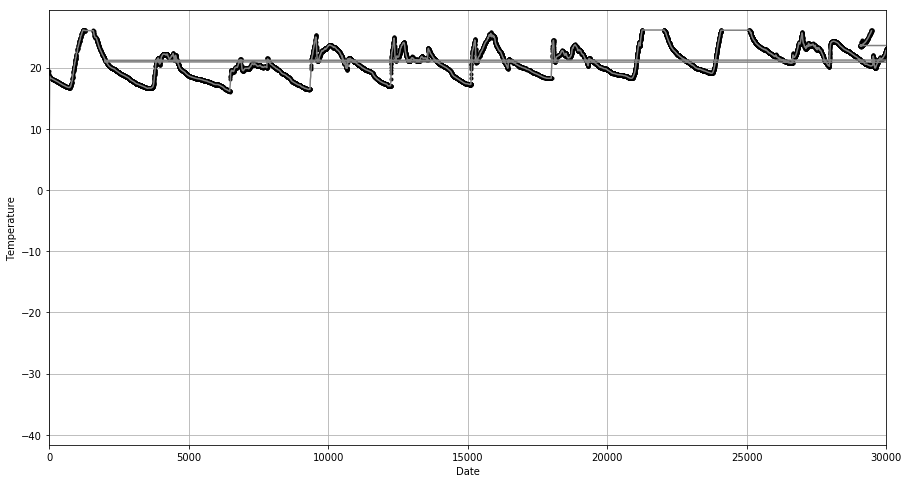

In [8]:
x = d[:d.shape[0]]['2']
Y = d[:d.shape[0]]['4']

plot_results2(x, y=Y, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")

In [9]:
def final_results(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    y_av = moving_average(y, window_size)

    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
    print(len(x_anomaly))
    return x_anomaly

x = d[:d.shape[0]]['2']
Y = d[:d.shape[0]]['4']

outliersIndices = final_results(x, y=Y, window_size=10, text_xlabel="2", sigma_value=2,text_ylabel="4")
outliersIndices

372


array([    0,     1,     2,     3,     4,   231,   240,   283,   284,
         285,   318,  1366,  1367,  2577,  2578,  2579,  2580,  2581,
        2582,  2583,  2584,  2586,  2587,  2722,  2724,  2725,  2860,
        3121,  3122,  3124,  3125,  3126,  3127,  3735,  3736,  3737,
        3738,  3739,  3740,  3741,  3742,  3743,  3744,  3802,  3803,
        3804,  3805,  3806,  3808,  3809,  3810,  3812,  3813,  3818,
        4156,  4163,  4165,  4194,  4201,  4202,  4204,  4208,  4209,
        4210,  4211,  4218,  4222,  4223,  4224,  4229,  4230,  4231,
        4232,  4233,  4234,  4235,  4236,  4237,  4238,  4239,  4240,
        4241,  4242,  4243,  4244,  4245,  4246,  4248,  4249,  4250,
        4251,  4252,  4254,  5003,  5004,  5005,  5007,  5008,  5009,
        5010,  5011,  5020,  5075,  5081,  5089,  5090,  5091,  5737,
        5738,  5739,  5741,  5742,  5743,  5744,  6445,  6446,  6447,
        6449,  6450,  6451,  6452,  6453,  6457,  6458,  6505,  6509,
        6514,  6515,

(30727, 8)
(30355, 8)
372


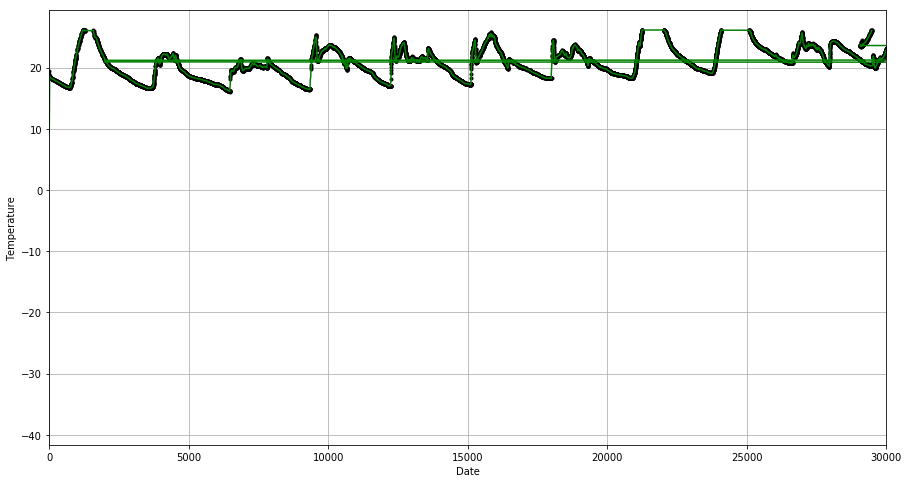

In [10]:
## Checando e removendo outliers no step 3.
passoO= d[:d.shape[0]].copy()
print(passoO.shape)
passoO= passoO.drop(passoO.index[outliersIndices])
print(passoO.shape)
def plot_resultsFinal(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
   
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, "r*")
# #     print(len(x_anomaly), x_anomaly)
    print(len(x_anomaly))

    
    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()  
def plot_resultsAOR(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
   
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, "r*")
# #     print(len(x_anomaly), x_anomaly)
    print(len(x_anomaly))

    
    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()   
# Step 3 COmplete Antes de remover outliers

xF = d[:d.shape[0]]['2']
YF = d[:d.shape[0]]['4']

# plot residual
plot_resultsAOR(xF, y=YF, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")

# Depois de ter os dados reconstruídos - verificamos a série temporal

3543


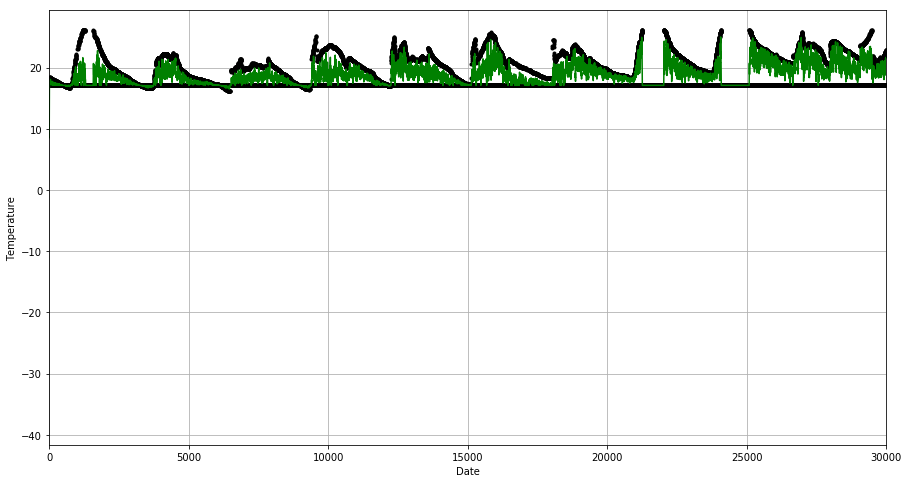

In [21]:
# Final reconstrução - passo 3 # Executar depois de gerar o dataframe teste no scrip do sensor
xF = teste['2']
YF = teste['4']

plot_resultsFinal(xF, y=YF, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")


# Estatísticas Simples

In [11]:
dplot[dplot['Moteid']==s].shape
# Passo 0
sensor = s
myDicInit = {
    'Data type':['Raw Data'],
    'size':[dplot[dplot['Moteid']==sensor].shape[0]], # Pegamos o shape dos dados brutos de dplot para cada sensor
    'mean':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].mean(),
    'SD':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].std(), 
    'median':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].median(),
    'MAD':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].mad()  
}

df0 = pd.DataFrame(myDicInit)
df0.head()


,Data type,size,mean,SD,median,MAD
0,Raw Data,48786,50.525772,44.693619,22.948,40.175438


In [12]:
# Passo 1
myDic = {
    'Data type':['step 1 (BOR)'],
    'size':[d.shape[0]], # d.shape[0] sensor
    'mean':d[:d.shape[0]]['4'].mean(),
    'SD':d[:d.shape[0]]['4'].std(), 
    'median':d[:d.shape[0]]['4'].median(),
    'MAD':d[:d.shape[0]]['4'].mad()  
}

df = pd.DataFrame(myDic)
df.head()


,Data type,size,mean,SD,median,MAD
0,step 1 (BOR),30727,21.161829,2.049063,21.1154,1.602168


In [13]:
# Passo 2

myDicResidualRemoved = {
    'Data type':['step 2 (AOR'],
    'size':[passoO.shape[0]],
    'mean':passoO['4'].mean(),
    'SD':passoO['4'].std(), 
    'median':passoO['4'].median(),
    'MAD':passoO['4'].mad()  
}

dfResAOR = pd.DataFrame(myDicResidualRemoved)
print(passoO.shape[0])
dfResAOR.head()

30355


,Data type,size,mean,SD,median,MAD
0,step 2 (AOR,30355,21.157303,2.048232,21.1056,1.601664


# Passo 3 - Esse passo é feito depois de ser gerado pelo scrip sx_sy_sz-FI 

In [19]:
# Passo 3 - Esse passo é feito depois de ser gerado pelo scrip s2_s1_s3-FI 

myDicFinalImputation = {
    'Data type':['step 3'],
    'size':[teste.shape[0]],
    'mean':teste['4'].mean(),
    'SD':teste['4'].std(), 
    'median':teste['4'].median(),
    'MAD':teste['4'].mad()  
}

dfFinalI = pd.DataFrame(myDicFinalImputation)
print(teste.shape[0])
dfFinalI.head()

65536


,Data type,size,mean,SD,median,MAD
0,step 3,65536,18.976037,2.433975,17.1,2.143681


In [20]:
print( df0.head() )
print( df.head() )
print( dfResAOR.head() )
print( dfFinalI.head() )

  Data type   size       mean         SD  median        MAD
0  Raw Data  48786  50.525772  44.693619  22.948  40.175438
      Data type   size       mean        SD   median       MAD
0  step 1 (BOR)  30727  21.161829  2.049063  21.1154  1.602168
     Data type   size       mean        SD   median       MAD
0  step 2 (AOR  30355  21.157303  2.048232  21.1056  1.601664
  Data type   size       mean        SD  median       MAD
0    step 3  65536  18.976037  2.433975    17.1  2.143681


##  Etapa para reconstruir as Épocas que estão faltando

In [14]:
indiceImput = []
for i in range(65536):
    indiceImput.append(i)
np.max(indiceImput)
passoOEp = passoO['2'].tolist()
len(passoOEp)

idInputEq = set(indiceImput)
idInputNEq = set(passoOEp)
resultIntersecEp = list( idInputEq - idInputNEq )

print(len(resultIntersecEp)) # {4, 6, 10}

print(len(idInputEq), len(idInputNEq))

35239
65536 30297


In [15]:
# Create a time series of 2000 elements, one very five minutes starting on 1/1/2000
time = pd.date_range('2004-02-28', periods=65536, freq='31s')

# Create a pandas series with a random values between 0 and 100, using 'time' as the index
series = pd.Series(np.random.randint(100, size=65536), index=time)
# View the first few rows of the data
series[0:3]
# dfHora = series.to
dfHora  =pd.DataFrame(series, columns=['1'])

data.shape, type( len(resultIntersecEp) ), dfHora.head(1)

((30727, 8), int,              1
 2004-02-28  70)

In [16]:
# tamanho resultIntersecEp # CSV das épocas faltantes
listofzeros = [0] * len(resultIntersecEp)

#len(resultIntersecEp)
myDicNewdf2 = {
    '0':dplot[:len(resultIntersecEp)]['Date'],
    '1':dplot[:len(resultIntersecEp)]['Time'],#data[:32828]['1']
    '2':resultIntersecEp[:len(resultIntersecEp)],
    '3':dplot[:len(resultIntersecEp)]['Moteid'], 
    '4':listofzeros,
    '5':dplot[:len(resultIntersecEp)]['Humidity'],
    '6':dplot[:len(resultIntersecEp)]['Light'],
    '7':dplot[:len(resultIntersecEp)]['Voltage']  
}

dfOut = pd.DataFrame(myDicNewdf2)
print(dfOut.shape[0])
dfOut.to_csv('csvAllOutliers.csv', index=False)
# dfOut.tail(10)


35239


# Gerando o csv para fazer reconstrução dos dados

In [17]:
# Gerando o csv para fazer reconstrução dos dados
dfFinalStep = pd.concat([dfOut,passoO], sort='2', axis=0)
dfFinalStep.sort_values(by = '2', inplace = True)

# dfFinalStep.set_index('2', inplace=True)
print(dfFinalStep.shape)

dfFinalStep.tail(10)
# 65536-65623
dfFinalStep.to_csv('dfImputation.csv', index=False)

(65594, 8)


# Depois de ter obtido o resultado do script joga o resultado aqui

In [18]:
final= pd.read_csv('finalsensor.csv')
teste = final.drop_duplicates(subset=['2'],keep='first', inplace=False)
teste.shape, dfFinalStep.shape


((65536, 9), (65594, 8))